In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('/content/drive/MyDrive/IRIS FLOWER CLASSIFICATION/IRIS.csv')

In [12]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


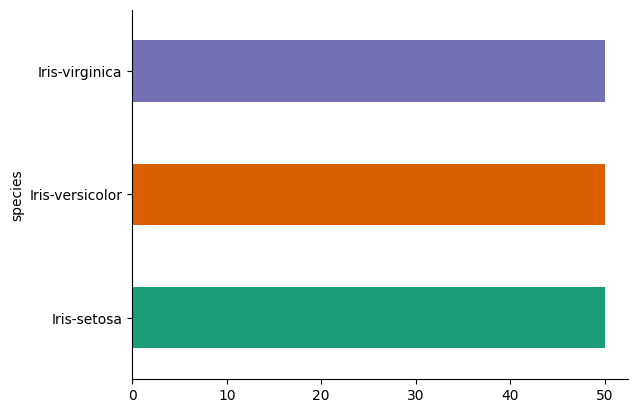

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

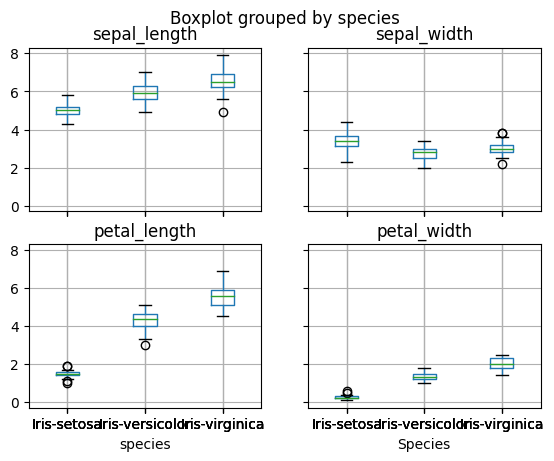

In [17]:
import matplotlib.pyplot as plt
df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], by='species')
plt.xlabel('Species')
_ = plt.ylabel('Dimension')

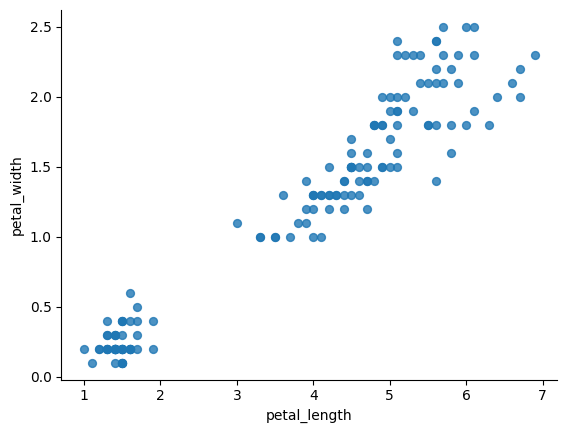

In [18]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

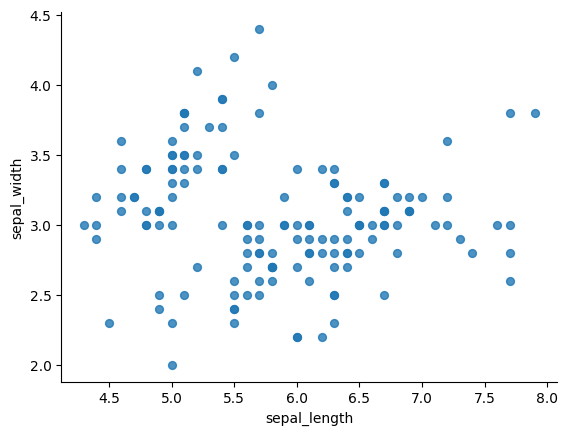

In [19]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

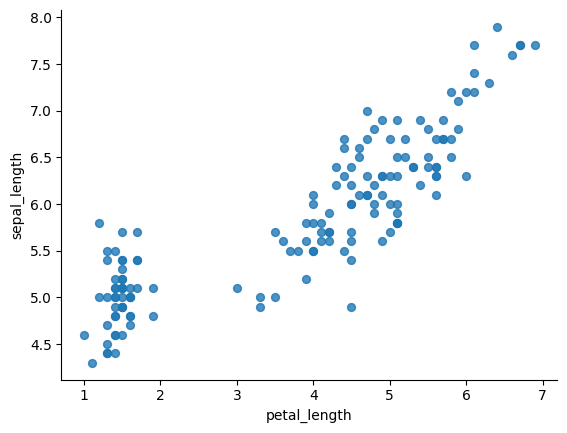

In [20]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_length', y='sepal_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

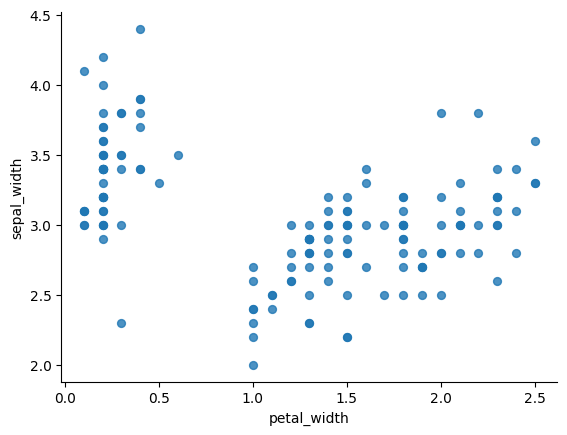

In [21]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='petal_width', y='sepal_width', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [24]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_train, y_train)
knnmodel.score(x_test, y_test)

0.9111111111111111

In [25]:
dmodel = DecisionTreeClassifier()
dmodel.fit(x_train, y_train)
dmodel.score(x_test, y_test)

0.8888888888888888

In [28]:
while True:
  data = {}
  data['sepal_length'] = float(input('Enter sepal length : '))
  data['sepal_width'] = float(input('Enter sepal width : '))
  data['petal_length'] = float(input('Enter petal length : '))
  data['petal_width'] = float(input('Enter petal width : '))

  testdf = pd.DataFrame(data, index=[0])
  knn_pred = knnmodel.predict(testdf)
  dtc_pred = dmodel.predict(testdf)[0]
  print("\nPredicted Ratings:")
  print(f"K-Neighbors Classifier: {knn_pred}")
  print(f"Decision Tree Classifier: {dtc_pred}")
  contin = int(input('Enter 1 to continue'))
  if contin != 1:
    break

Enter sepal length : 2.6
Enter sepal width : 4.1
Enter petal length : 2.5
Enter petal width : 3.2

Predicted Ratings:
K-Neighbors Classifier: ['Iris-versicolor']
Decision Tree Classifier: Iris-versicolor
Enter 1 to continue0
